In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

In [23]:
df = pd.read_excel("real_training_data.xlsx")
df.drop([i for i in range(27, len(df))])

,Sample,Material,Unnamed: 2,Unnamed: 3,peak 1,peak 2,peak 1 intensity,peak 2 intensity,w1,w2,Peak difference,Contrast Variation,Layers
0,Sample 1,MoS2,1,loc1,379.98,405.80,442.25,569.91,3.82,4.33,25.82,NaN,5
1,NaN,NaN,1,loc2,380.65,404.83,177.14,206.78,3.45,4.51,24.18,NaN,4
2,NaN,NaN,1,loc3,381.65,403.00,121.83,138.11,3.39,4.51,21.35,NaN,2
3,NaN,NaN,1,loc4,380.81,405.07,334.06,373.05,3.24,4.67,24.26,NaN,4
4,NaN,NaN,1,loc5,381.20,404.30,206.99,208.58,3.25,5.24,23.10,NaN,3
5,NaN,NaN,1,loc6,380.24,405.86,328.09,386.24,3.47,4.44,25.62,NaN,5
6,NaN,NaN,2,loc1,380.84,405.46,394.82,425.22,3.41,4.91,24.62,NaN,4
7,NaN,NaN,2,loc2,380.78,405.20,372.38,386.64,3.34,4.90,24.42,NaN,4
8,NaN,NaN,2,loc3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1
9,NaN,NaN,3,loc1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1


In [33]:
df.iloc[8]

Sample                 NaN
Material               NaN
Unnamed: 2               2
Unnamed: 3            loc3
peak 1                 NaN
peak 2                 NaN
peak 1 intensity       NaN
peak 2 intensity       NaN
w1                     NaN
w2                     NaN
Peak difference        0.0
Contrast Variation     NaN
Layers                   1
Name: 8, dtype: object

In [6]:
df["Image"] = df["Image"].apply(lambda x: x[:-4] + x[-3:])

In [7]:
def layers(peak_dif: float):
    if peak_dif <= 21:
        return 1
    elif peak_dif > 21 and peak_dif < 23:
        return 2
    elif peak_dif >= 23 and peak_dif <= 24:
        return 3;
    elif peak_dif > 24 and peak_dif <= 25:
        return 4
    else:
        return 5

df["Layers"] = df["Peak difference"].apply(layers)
df.head()

,Sample,Material,Unnamed: 2,Unnamed: 3,peak 1,peak 2,peak 1 intensity,peak 2 intensity,w1,w2,Peak difference,Contrast Variation,Layers
0,Sample 1,MoS2,1,loc1,379.98,405.80,442.25,569.91,3.82,4.33,25.82,NaN,5
1,NaN,NaN,1,loc2,380.65,404.83,177.14,206.78,3.45,4.51,24.18,NaN,4
2,NaN,NaN,1,loc3,381.65,403.00,121.83,138.11,3.39,4.51,21.35,NaN,2
3,NaN,NaN,1,loc4,380.81,405.07,334.06,373.05,3.24,4.67,24.26,NaN,4
4,NaN,NaN,1,loc5,381.20,404.30,206.99,208.58,3.25,5.24,23.10,NaN,3


In [8]:
df.to_excel("real_training_data.xlsx", index=False)

In [5]:
df = pd.read_csv("training_data.csv")
df.head()

,Unnamed: 0,File,Image,E2g,A1g,E2g Intensity,A1g Intensity,Peak Difference,Intensity Difference,Layers
0,0,ML Training Data/Raman/Sample 1/MoS2_3_loc4.txt,ML Training Data/Raman/Sample 1/MoS2_3_loc4.jpg,380.193334,404.365403,289.610407,243.259310,24.172069,46.351098,4
1,1,ML Training Data/Raman/Sample 1/MoS2_3_loc5.txt,ML Training Data/Raman/Sample 1/MoS2_3_loc5.jpg,380.681672,405.049124,256.422420,192.661141,24.367452,63.761280,4
2,2,ML Training Data/Raman/Sample 1/MoS2_2_loc2.txt,ML Training Data/Raman/Sample 1/MoS2_2_loc2.jpg,379.980250,404.936630,368.277385,316.038508,24.956380,52.238878,4
3,3,ML Training Data/Raman/Sample 1/MoS2_3_loc2.txt,ML Training Data/Raman/Sample 1/MoS2_3_loc2.jpg,381.351200,402.825652,141.462197,107.443830,21.474452,34.018367,2
4,4,ML Training Data/Raman/Sample 1/MoS2_3_loc3.txt,ML Training Data/Raman/Sample 1/MoS2_3_loc3.jpg,381.405935,402.889555,141.368201,140.975344,21.483620,0.392857,2


In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df.sort_values(by=['Image'], inplace=True)

In [11]:
df.to_csv("training_data.csv", header=True, index=False)

Series([], Name: Layers, dtype: int64)


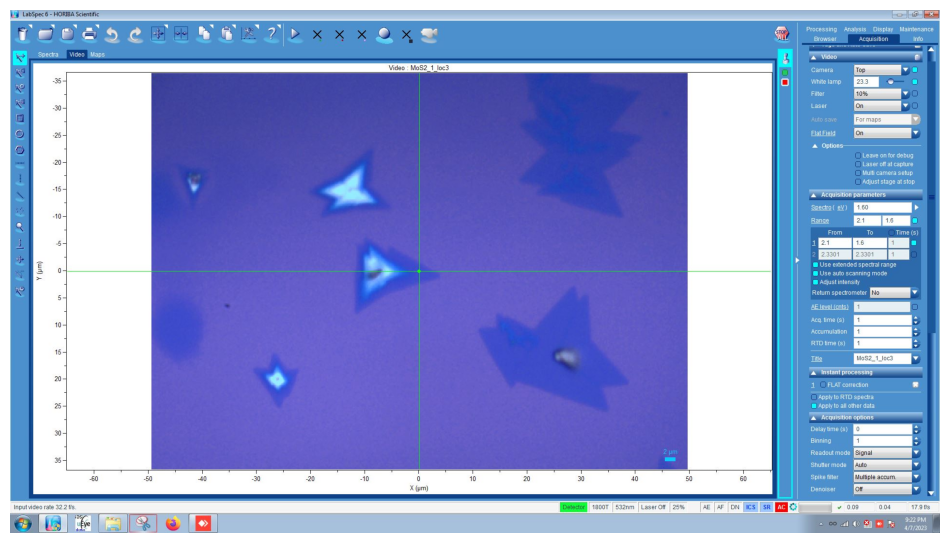

In [ ]:
my_df = pd.read_csv("training_data.csv")
sample_num = 3
cluster = 1
pic_location =4
print(my_df.loc[my_df["Image"].str.contains(f"Sample {sample_num}/MoS2_{cluster}_loc{pic_location}.jpg")]["Layers"])
plt.figure(figsize=(12,12))
plt.imshow(plt.imread(f'/Volumes/BEAR/Images_new/Sample {sample_num}/MoS2_{cluster}_loc{pic_location}.JPG'))
plt.axis('off')
plt.show()

133    NaN
Name: LAYERS, dtype: object


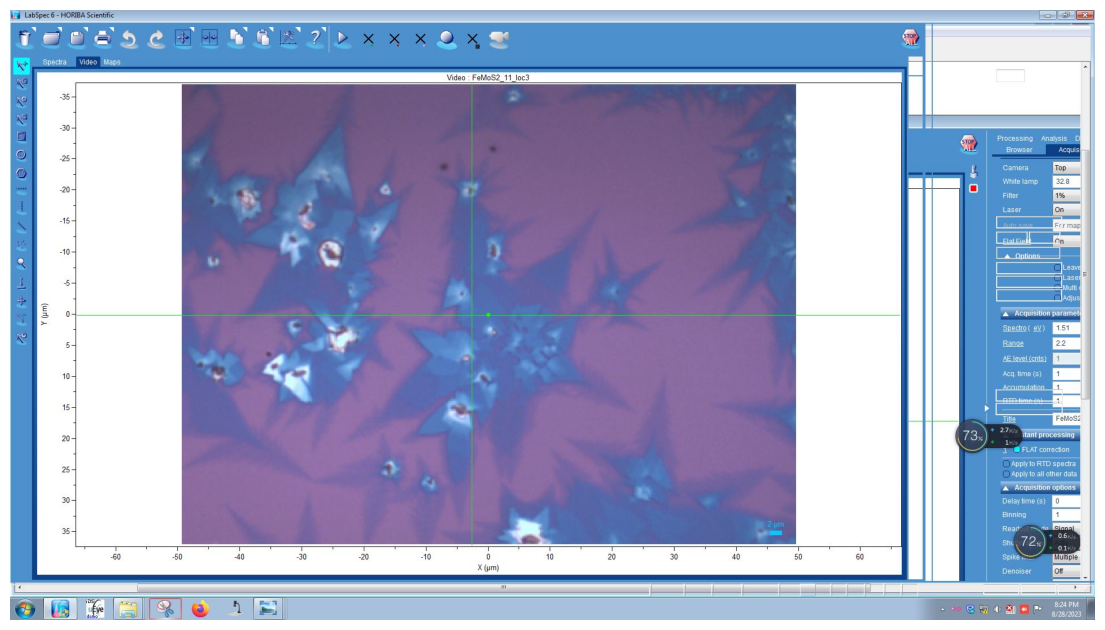

In [77]:
df = pd.read_excel("Collected-data.xlsx")
sample_num = 24
cluster = 11
pic_location =4
print(df.loc[df["Title"].str.contains(f"Sample {sample_num}_FeMoS2_{cluster}_loc{pic_location}.txt")]["LAYERS"])
plt.figure(figsize=(14,14))
plt.imshow(plt.imread(f'/Volumes/BEAR/Images_new/Sample {sample_num}/FeMoS2_{cluster}_loc{pic_location}.JPG'))
plt.axis('off')
plt.show()

In [5]:
df.loc[97]

Unnamed: 0                                       97.0
Title                     Sample 21_FeMoS2_1_loc1.txt
Peak 1                                     379.128659
Peak 2                                     400.230776
Peak 1 Intensity                            72.243319
Peak 2 Intensity                             87.37186
Peak Difference                             21.102118
Peak Diference (Round)                            NaN
LAYERS                                            NaN
Contrast Variation                                NaN
Name: 97, dtype: object